<a href="https://colab.research.google.com/github/Eduarmma19/videos_youtube/blob/main/Everton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATOS JUGADORES DEL EVERTON
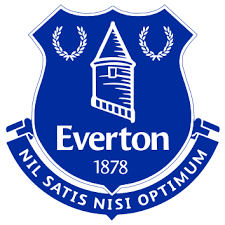

## Librerías a usar 

In [ ]:
install.packages("ggthemes")
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rvest)
library(dplyr)
library(tidyverse)
url <- "https://www.premierleague.com/clubs/7/Everton/squad"
pagina_everton <- read_html(url)

In [ ]:
nombres <- pagina_everton %>% html_nodes(".name")%>%html_text()
nombres <- nombres[21:47]
nacionalidad <- pagina_everton %>% html_nodes(".nationality .info") %>% html_text()
apariciones <- pagina_everton %>% html_nodes(".nationality+ li .info") %>% html_text()
posicion <- pagina_everton %>% html_nodes(".position")%>% html_text()

In [ ]:
df <- data.frame(nombres,nacionalidad,apariciones,posicion)
df$apariciones <- as.numeric(df$apariciones)
df$nombres <- as.character(df$nombres)

In [ ]:
besic <- which(df$nombres == "Muhamed Besic")
gbamin <- which(df$nombres == "Jean-Philippe Gbamin")

df[besic,"nacionalidad"] <- "Bosnia"
df[gbamin,"nacionalidad"] <- "Ivory Coast"

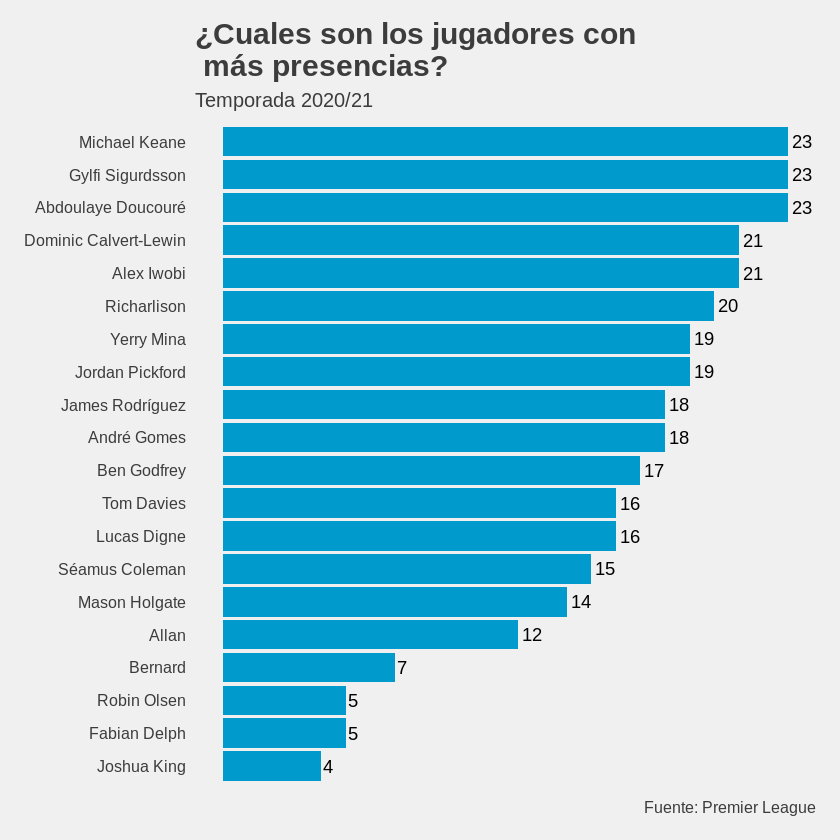

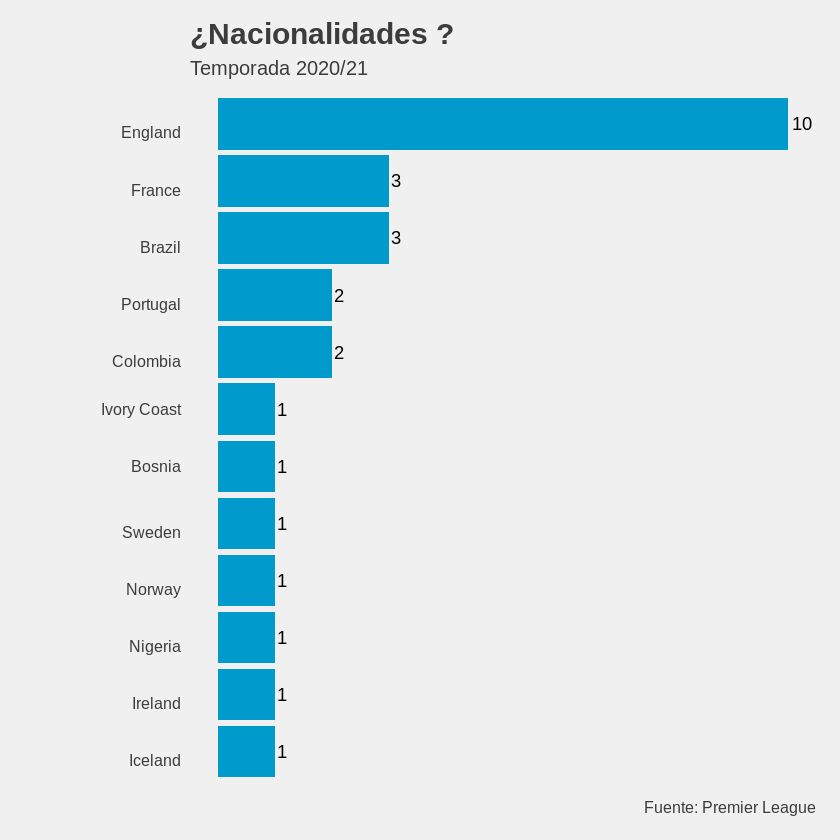

In [ ]:
p <- df %>% filter(apariciones >1)  %>%mutate(nombres = reorder(nombres,apariciones)) %>% ggplot()+ 
  aes(x = nombres, y = apariciones) + geom_bar(stat = "identity", fill = "deepskyblue3") + coord_flip() + theme_fivethirtyeight()+
  geom_text(aes(label = apariciones),hjust = -0.2) +
   labs(title = "¿Cuales son los jugadores con \n más presencias?",subtitle = "Temporada 2020/21",caption = "Fuente: Premier League") + 
   theme(panel.grid.major = element_blank(),axis.text.x = element_blank())

q <- df%>%group_by(nacionalidad)%>%summarise(cuenta = n())%>% ggplot()+aes(x = reorder(nacionalidad,cuenta),y = cuenta) + 
geom_bar(stat = "identity",fill = "deepskyblue3") + coord_flip() + theme_fivethirtyeight()+
  geom_text(aes(label = cuenta),hjust = -0.2) +
   labs(title = "¿Nacionalidades ?",subtitle = "Temporada 2020/21",caption = "Fuente: Premier League") + 
   theme(panel.grid.major = element_blank(),axis.text.x = element_blank())

p
q


In [ ]:
#Sacamos a los arqueros y nos quedamos con los defensas en adelante
df_jugadores <- df %>% filter(posicion != "Goalkeeper")
links_jugador <- pagina_everton %>% html_nodes("div.wrapper.col-12 > div > ul > li:nth-child(5) > a") %>% html_attr("href")

In [ ]:
# Links de los jugadores 
links_jugadores <- c()
jugadores <- c()
for (n_jugador in seq(from = 27,to = 5,by = -1)){
  x <- paste0("#mainContent > div.wrapper.col-12 > div > ul > li:nth-child(",n_jugador,") > a")
  links_jugadores <- c(links_jugadores,x)

  jugadores <- c(pagina_everton %>%html_nodes(x)%>% html_attr("href"),jugadores)
}


In [ ]:
links_completo <- paste0("https://www.premierleague.com",str_replace(jugadores,"overview","stats"))


In [ ]:
estadisticas <- data.frame()
obtener_estadisticas <- function(links){
  pagina_estadistica <- read_html(links)
  wins<- pagina_estadistica %>% html_nodes("#mainContent > div.wrapper.hasFixedSidebar > div > div > div.playerInfo > div > div > div > div:nth-child(3) > span > span") %>% html_text()
  loses <- pagina_estadistica %>% html_nodes("#mainContent > div.wrapper.hasFixedSidebar > div > div > div.playerInfo > div > div > div > div:nth-child(4) > span > span") %>% html_text()
 
  estadisticas <- rbind(estadisticas,data.frame(wins,loses))
  estadisticas
}

In [ ]:
df_estadisticas <- sapply(links_completo,obtener_estadisticas,USE.NAMES = FALSE)


In [ ]:
df_estadisticas <- t(df_estadisticas)
df_estadisticas <- as.data.frame(df_estadisticas)

In [ ]:
df_final <- cbind(df_jugadores[,-3],df_estadisticas)
df_final

nombres,nacionalidad,posicion,wins,loses
<chr>,<chr>,<chr>,<list>,<list>
Mason Holgate,England,Defender,35,21
Michael Keane,England,Defender,63,71
Lucas Digne,France,Defender,34,32
Yerry Mina,Colombia,Defender,26,21
Séamus Coleman,Ireland,Defender,120,84
Niels Nkounkou,France,Defender,0,1
Ben Godfrey,England,Defender,13,27
Thierry Small,England,Defender,0,0
Fabian Delph,England,Midfielder,77,76
